In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import display, Image, Markdown

from get_dynamics import change_positions, show_dynamics

In [3]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [28]:
names = ['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [41]:
%store -r organic
%store -r positions

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [29]:
curr_month = data.index[-1][0]
data.ix[curr_month]

,geo,url,note,cost,duration
0,both,https://sape.ru,биржа арендных ссылок,3071.63,1
1,both,https://etxt.biz,тексты,1563.48,1
2,both,https://ru.depositphotos.com/,фотосток,610.69,1
3,both,https://advego.ru,тексты,1009.50,1
4,spb,https://spb.dlyasvadbi.ru/salony-svadebnyh-pla...,,0.00,12
5,spb,http://www.be-pretty.ru/companies/love-forever/,,0.00,12
6,msk,https://dlyasvadbi.ru/salony-svadebnyh-platev/...,,0.00,12
7,msk,http://vdvoem.com/index.php?shop=love-forever,,0.00,12
8,msk,http://my-svadba.ru/blog/item/44192/,,0.00,12
9,both,http://svadba-vals.ru/clubs/30,,0.00,12


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными.

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию.

### Расходы в разрезе регионов за текущий период

In [30]:
#data.groupby('reg')[['cost']].sum()
pd.pivot_table(data.ix[curr_month], values='cost', index=['geo'], 
                         aggfunc=sum, margins=True).to_frame() #.ix['All'] - (39600 + 26400)

,cost
geo,
both,6255.30
msk,37745.55
spb,22259.30
All,66260.15


## 2. Анализ трафика

### 2.1. LOVE-FOREVER.RU

Таблица с данными по величине поискового трафика c 2016 года и его изменениям к месяцу и году.

In [8]:
# organic = organic.applymap(lambda x: '{:.2f}'.format(x))
show_dynamics(organic['msk']['2016':'2017'], 'branded')

,traffic,branded,MoM,YoY
2016-01-31,16046,5.83,44.0,346.0
2016-02-29,17191,↑7.33 (+1.5),7.0,303.0
2016-03-31,17825,↑7.89 (+0.56),4.0,150.0
2016-04-30,17671,↑8.11 (+0.22),-1.0,86.0
2016-05-31,18611,↑8.81 (+0.7),5.0,36.0
2016-06-30,18821,↓7.11 (-1.7),1.0,20.0
2016-07-31,17058,↓6.60 (-0.51),-9.0,2.0
2016-08-31,15728,↓6.21 (-0.39),-8.0,-0.0
2016-09-30,13497,↓5.42 (-0.79),-14.0,-7.0
2016-10-31,11486,↑6.73 (+1.31),-15.0,-17.0


**Комментарий:** Впервые за весь период наблюдений трафик в октябре показал положительную динамику при общем падающем тренде. Рост составил **6%** в относительных цифрах.
Новая колонка **branded** показывает размер брендового трафика относительно общего поискового. 

Что считается брендовым запросом: 
1. содержащий название сайта salon-love-forever.ru (в любых вариациях);
2. содержащий название салона Love Forever и других альтернативных способов написания, например «Лав Форевер».

**Источник:** https://metrika.yandex.ru

<p><b>branded</b> — количество брендового трафика, %
<br/><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

### Линейная диаграмма изменения трафика

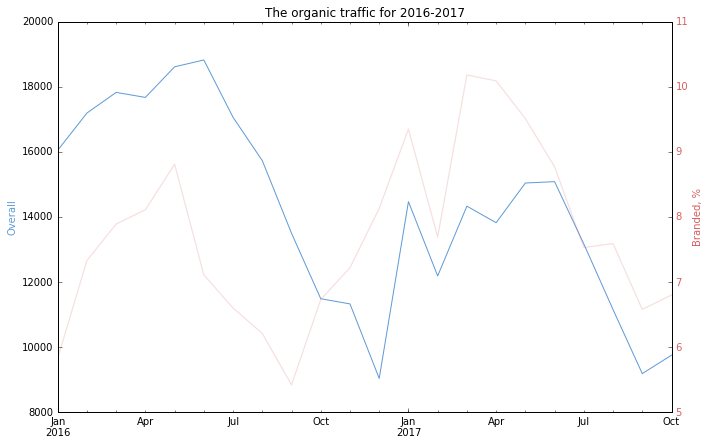

In [11]:
red, blue = '#d65f5f', '#5f9bd6'
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['msk']['2016':'2017'].traffic.plot(ax=ax, color=blue)
ax.set_title('The organic traffic for 2016-2017')
ax.set_ylabel('Overall', color=blue)
# ax.legend(loc='upper right');
ax2 = ax.twinx()
organic['msk']['2016':'2017'].branded.plot(color=red, linewidth=1.2, alpha=.2)
# ax2.plot(y1, 'r-')
ax2.set_ylabel('Branded, %', color=red)
for tl in ax2.get_yticklabels():
    tl.set_color(red)

### Подсветка данных

In [12]:
# display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

In [13]:
# display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [13]:
negative_MoM = organic['msk']['MoM'] < 0

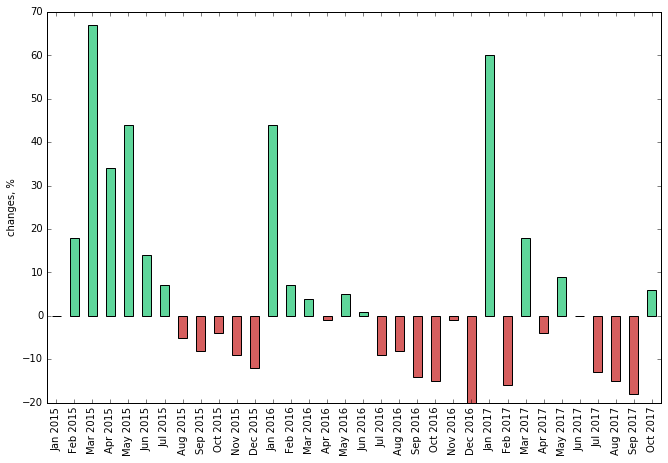

In [14]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['msk'].MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fd69b'}));
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic['msk'].index]);

На диаграмме чётко видна сезонная волатильность поискового трафика.

### 2.2. SPB.LOVE-FOREVER.RU

Таблица с данными по органическому трафику с марта 2017

In [9]:
show_dynamics(organic['spb'], 'branded')

,traffic,branded,MoM
2017-03-31,13,7.69,NaN
2017-04-30,508,↑17.72 (+10.03),3808.0
2017-05-31,998,↑18.14 (+0.42),96.0
2017-06-30,1296,↓14.20 (-3.94),30.0
2017-07-31,1259,↓12.07 (-2.13),-3.0
2017-08-31,1065,↑16.81 (+4.74),-15.0
2017-09-30,1242,↓7.97 (-8.84),17.0
2017-10-31,1251,↑11.51 (+3.54),1.0


**Комментарий:** наблюдается небольшой рост **↑+1%** по отношению к предыдущему месяцу.

## 3. Анализ позиций

### 3.1. LOVE-FOREVER.RU

#### Позиции с интервалом в 7-10 дней
Выборка за сентябрь-октябрь

In [32]:
All = slice(None)

In [42]:
change_positions(positions['msk'].loc[(slice('2017-10','2017-11'), All), All])

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-10-03 вечерние платья               51          15            51   
           свадебные платья               2           7            21   
           свадебный салон               24          16             1   
2017-10-10 вечерние платья               51          44            31   
           свадебные платья               2           4             5   
           свадебный салон               14          25             1   
2017-10-17 вечерние платья               51          25            37   
           свадебные платья               2           4             8   
           свадебный салон               32          20             1   
2017-10-25 вечерние платья               51          20            39   
           свадебные платья               2           5            14   
           свадебный салон               25          18             2   
2017-11-05 вечерние платья               51          16            46   
           свадебные платья               2           3            10   
           свадебный салон               18          20             2   
2017-11-12 вечерние платья               51          19            46   
           свадебные платья               2           4             9   
           свадебный салон               33          22             2   
2017-11-19 вечерние платья               51          22            45   
           свадебные платья               1           4             8   
           свадебный салон               30          13             1   
2017-11-26 вечерние платья               51          21            37   
           свадебные платья               2           4             8   
           свадебный салон               37          12             1   
2017-11-30 вечерние платья               51    ↓27 (-6)      ↑32 (+5)   
           свадебные платья               2     ↓5 (-1)       ↑6 (+2)   
           свадебный салон        ↓51 (-14)    ↓17 (-5)             1   

                            salon-love-forever.ru  
2017-10-03 вечерние платья                     22  
           свадебные платья                    43  
           свадебный салон                     11  
2017-10-10 вечерние платья                      7  
           свадебные платья                    44  
           свадебный салон                     11  
2017-10-17 вечерние платья                      7  
           свадебные платья                     9  
           свадебный салон                     23  
2017-10-25 вечерние платья                      6  
           свадебные платья                    11  
           свадебный салон                     11  
2017-11-05 вечерние платья                      9  
           свадебные платья                     7  
           свадебный салон                     10  
2017-11-12 вечерние платья                     13  
           свадебные платья                     7  
           свадебный салон                     17  
2017-11-19 вечерние платья                     10  
           свадебные платья                     5  
           свадебный салон                      9  
2017-11-26 вечерние платья                     18  
           свадебные платья                     7  
           свадебный салон                     19  
2017-11-30 вечерние платья               ↑12 (+6)  
           свадебные платья               ↑3 (+4)  
           свадебный салон               ↑9 (+10)

**Комментарий:** снижение позиций по некоторым запросам я связываю с работой ратирующего алгоритма «Однорукий бандит».

#### Среднее значение позиций по месяцам и его изменение

In [43]:
change_positions(positions['msk'].unstack().resample('M', 
                            kind='period').mean().applymap(lambda x: round(x)).stack())

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-06 вечерние платья               51          23            44   
        свадебные платья               3           6            12   
        свадебный салон               15           4            11   
2017-07 вечерние платья               51          19            45   
        свадебные платья               2           5            19   
        свадебный салон               12           4             5   
2017-08 вечерние платья               51          26            44   
        свадебные платья               2           6            10   
        свадебный салон               38          23            13   
2017-09 вечерние платья               51          28            38   
        свадебные платья               2           5             8   
        свадебный салон               28          16             1   
2017-10 вечерние платья               51          26            40   
        свадебные платья               2           5            12   
        свадебный салон               24          20             1   
2017-11 вечерние платья               51    ↑21 (+5)      ↓41 (-1)   
        свадебные платья               2     ↑4 (+1)       ↑8 (+4)   
        свадебный салон        ↓34 (-10)    ↑17 (+3)             1   

                         salon-love-forever.ru  
2017-06 вечерние платья                     14  
        свадебные платья                    17  
        свадебный салон                      4  
2017-07 вечерние платья                     14  
        свадебные платья                    11  
        свадебный салон                      8  
2017-08 вечерние платья                     27  
        свадебные платья                    37  
        свадебный салон                     23  
2017-09 вечерние платья                     16  
        свадебные платья                    46  
        свадебный салон                     22  
2017-10 вечерние платья                     10  
        свадебные платья                    27  
        свадебный салон                     14  
2017-11 вечерние платья               ↓12 (-2)  
        свадебные платья              ↑6 (+21)  
        свадебный салон               ↑13 (+1)

### 3.2. SPB.LOVE-FOREVER.RU

In [37]:
# Перемещение столбца spb.salon-love-forever.ru в крайнюю правую часть таблицы
cols = positions['spb'].columns.tolist()
indx = cols.index('spb.salon-love-forever.ru')
cols.append(cols.pop(indx))

In [44]:
change_positions(positions['spb'][cols].loc[(slice('2017-10','2017-11'), All), All])

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-10-03 вечерние платья              2            51                51   
           свадебные платья             3             2                24   
           свадебный салон              4            51                23   
2017-10-10 вечерние платья              4             7                51   
           свадебные платья             6             3                 9   
           свадебный салон              8            51                13   
2017-10-17 вечерние платья              3             2                51   
           свадебные платья             4             1                15   
           свадебный салон              3            51                19   
2017-10-25 вечерние платья              2             5                51   
           свадебные платья             4             2                21   
           свадебный салон              2            51                21   
2017-11-05 вечерние платья             16             2                51   
           свадебные платья            15             2                24   
           свадебный салон             17            51                25   
2017-11-12 вечерние платья             12             1                51   
           свадебные платья            13             2                18   
           свадебный салон             33            51                17   
2017-11-19 вечерние платья             12             1                51   
           свадебные платья            13             2                18   
           свадебный салон             33            51                17   
2017-11-26 вечерние платья              6             1                51   
           свадебные платья            17             2                16   
           свадебный салон             20            51                18   
2017-11-30 вечерние платья      ↓17 (-11)       ↓2 (-1)                51   
           свадебные платья      ↓20 (-3)             2          ↑13 (+3)   
           свадебный салон      ↓32 (-12)            51           ↑9 (+9)   

                            vbelom.ru vesnawedding.ru  \
2017-10-03 вечерние платья         11              51   
           свадебные платья         6               1   
           свадебный салон          1               3   
2017-10-10 вечерние платья          8              51   
           свадебные платья        18               1   
           свадебный салон          1               5   
2017-10-17 вечерние платья         10              51   
           свадебные платья         9               2   
           свадебный салон          1               2   
2017-10-25 вечерние платья          9              51   
           свадебные платья         9               1   
           свадебный салон          1               3   
2017-11-05 вечерние платья          7              51   
           свадебные платья        11               1   
           свадебный салон          1               2   
2017-11-12 вечерние платья         13              51   
           свадебные платья         7               1   
           свадебный салон          1               3   
2017-11-19 вечерние платья         13              51   
           свадебные платья         7               1   
           свадебный салон          1               3   
2017-11-26 вечерние платья         10              51   
           свадебные платья         6               1   
           свадебный салон          1               4   
2017-11-30 вечерние платья         10              51   
           свадебные платья  ↓11 (-5)               1   
           свадебный салон    ↓2 (-1)         ↓8 (-4)   

                            spb.salon-love-forever.ru  
2017-10-03 вечерние платья                         19  
           свадебные платья                         5  
           свадебный салон                         24  
2017-10-10 вечерние платья                        

**Комментарий:** стоит поработать с релевантностью документа /evening/, уменьшив размер и «водность» текста.

#### Среднее значение позиций по месяцам и его изменение

In [45]:
change_positions(positions['spb'][cols].unstack().resample('M', 
                                kind='period').mean().applymap(lambda x: round(x)).stack())

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-08 вечерние платья              5            25                51   
        свадебные платья             2            26                21   
        свадебный салон             25            40                 7   
2017-09 вечерние платья             10            46                51   
        свадебные платья             8            30                14   
        свадебный салон             19            47                 9   
2017-10 вечерние платья              3            16                51   
        свадебные платья             4             2                17   
        свадебный салон              4            51                19   
2017-11 вечерние платья      ↓13 (-10)      ↑1 (+15)                51   
        свадебные платья     ↓16 (-12)             2          ↓18 (-1)   
        свадебный салон      ↓27 (-23)            51          ↑17 (+2)   

                         vbelom.ru vesnawedding.ru spb.salon-love-forever.ru  
2017-08 вечерние платья         32              51                        35  
        свадебные платья        24               1                        23  
        свадебный салон          2               6                        45  
2017-09 вечерние платья         17              51                        18  
        свадебные платья        16               1                         8  
        свадебный салон          1               6                        27  
2017-10 вечерние платья         10              51                        26  
        свадебные платья        10               1                         6  
        свадебный салон          1               3                        24  
2017-11 вечерние платья   ↓11 (-1)              51                  ↑22 (+4)  
        свадебные платья   ↑8 (+2)               1                   ↓7 (-1)  
        свадебный салон          1         ↓4 (-1)                  ↓33 (-9)

**Источник:** https://xml.yandex.ru

Позиции в таблице и в текущей выдаче Яндекса могут отличаться из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.